# Loan Data from Prosper Data Exploration
## by Kareem Zaghawa

## Preliminary Wrangling

>  This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [6]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [171]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
df.shape

(113937, 81)

### What is the structure of your dataset?

> - This dataset contains 113,937 loans with 80 variables. 
> - Most of the variables are either numeric (discrete quantitative) or categorical 

### What is/are the main feature(s) of interest in your dataset?

> - We're trying to reach some insights regarding what factors affect the loan's status. And since there are many variables in our dataset, I did some research on what factors mostly affect the loan's status and the most occuring factors which started to give me a guideline for going through data are: 
    - Debt-to-income ratio 
    - Income 
    - Proof of income 
    - Employment History
    - Recent payment history
    - Housing history

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - The variables I'm going to explore in this dataset are : 
     - DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
     - IncomeRange: The income range of the borrower at the time the listing was created.
     - IncomeVerifiable: The borrower indicated they have the required documentation to support their income.
     - StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
     - EmploymentStatus: The employment status of the borrower at the time they posted the listing. 
     - EmploymentStatusDuration: The length in months of the employment status at the time the listing was        created.
     - IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their     credit profile or provide documentation confirming they are a homeowner.
     - Occupation
     - Term: Length of loan expressed in months
     - TotalProsperLoans
     - TotalProsperPaymentsBilled
     - OnTimeProsperPayments
     - Recommendations: Number of recommendations the borrower had at the time the listing was created.
     - ProsperScore
     - ListingCategory
    

In [9]:
def_color = sb.color_palette()[0]

## Univariate Exploration

### Distribution of loans status

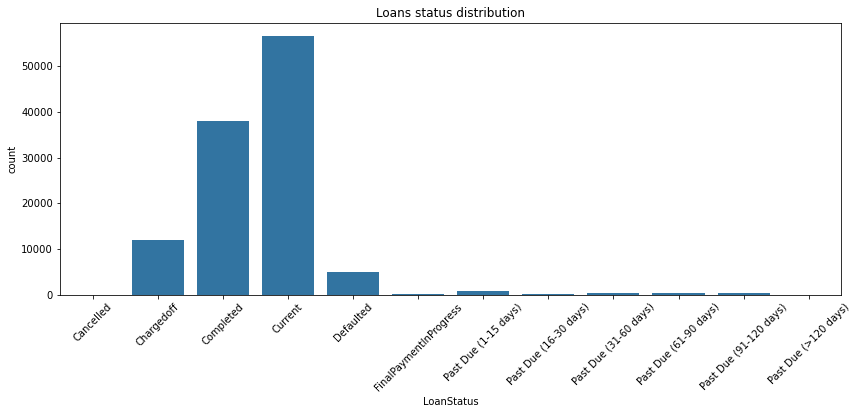

In [323]:
df['LoanStatus'] = df['LoanStatus'].astype('category')
plt.figure(figsize=(14,5))
sb.countplot(data = df, x ='LoanStatus', color = sb.color_palette()[0])
plt.xticks(rotation=45);
plt.title('Loans status distribution');

We see here that there are 12 status, Most of the loans' status in our data are in Current, Completed, Charged Off, Defaulted status respectively.

I'll now look at the Loan's term

### Loans' term Distribution

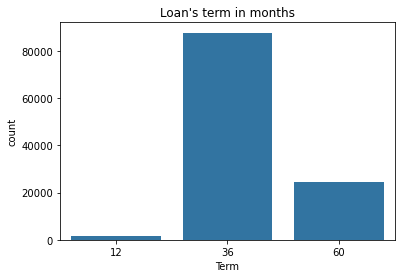

In [11]:
sb.countplot(data = df,x= 'Term', color=sb.color_palette()[0]);
plt.title("Loan's term in months");

Loans' term fall into 3 categories with 36 months being the most.

I'll now look at the income range

### Distribution of Income Range

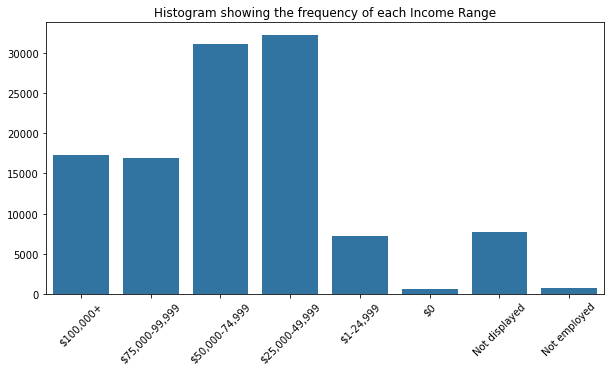

In [12]:
order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not displayed',
         'Not employed']
cat = pd.api.types.CategoricalDtype(categories = order, ordered=True)
df['IncomeRange'] = df['IncomeRange'].astype(str).astype(cat)
plt.figure(figsize=(10,5))
sb.countplot(data=df, x='IncomeRange',color=sb.color_palette()[0])
plt.xticks(rotation=45);
plt.xlabel('')
plt.ylabel('')
plt.title('Histogram showing the frequency of each Income Range');

Most of the borrowers' income range are (25,000 - 49,999) followed by (50,000 - 74,999) followed by (75,000 - 99,999) followed by (>100,000)


I'll now look at whether the borrower is a homeonwer or not

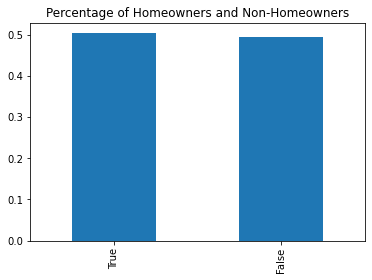

In [13]:
por = df['IsBorrowerHomeowner'].value_counts()/len(df)
por.plot(kind='bar', title='Percentage of Homeowners and Non-Homeowners');

We see here that the percentages are similar for the two states

I'll now look at the employment duration

In [17]:
df['EmploymentStatusDuration'].value_counts()

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
581.0       1
570.0       1
574.0       1
590.0       1
672.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

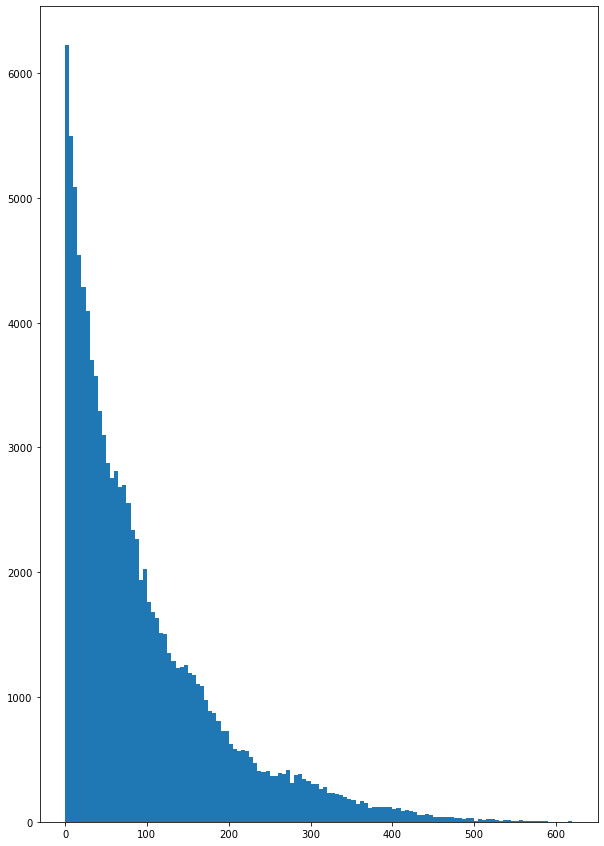

In [15]:
bins = np.arange(0,625,5)
plt.figure(figsize=(10,15))
plt.hist(data=df, x='EmploymentStatusDuration',bins=bins);

We see that the distribution is right-skewed. I'll explore it on a log scale 

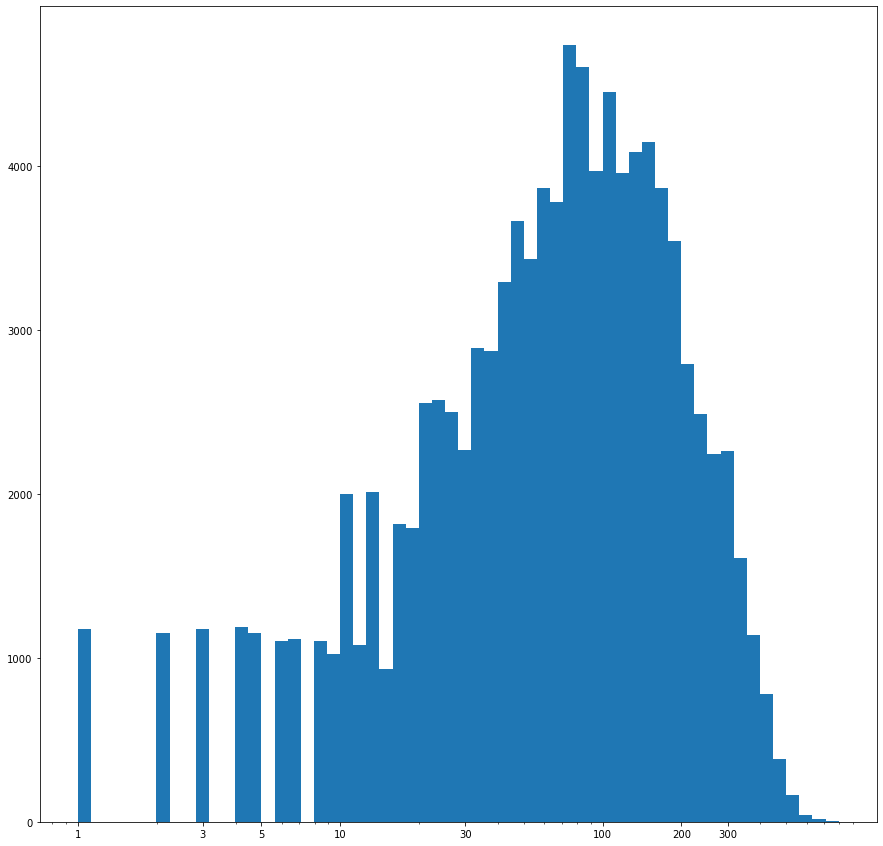

In [35]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['EmploymentStatusDuration'].max())+log_binsize, log_binsize)
plt.figure(figsize=(15,15))
plt.hist(data=df, x='EmploymentStatusDuration',bins=bins);
plt.xscale('log')
plt.xticks([1,3,5,10,30,100,200,300],['1','3','5','10','30','100','200','300']);

The bulk of our borrowers' employment duration lie between 20 and 200

I'll now look at the Prosper Score which is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. 

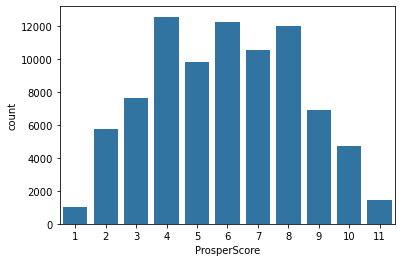

In [19]:
order = np.arange(1,12,1)
sb.countplot(data= df, x='ProsperScore',order= order, color = sb.color_palette()[0]);

I'll now look at the stated monthly income. 

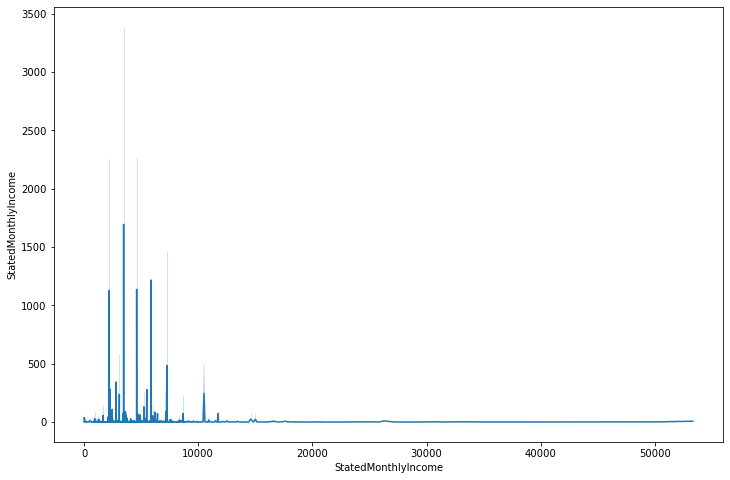

In [69]:
plt.figure(figsize=(12,8))
sb.lineplot(data =df, x = df['StatedMonthlyIncome'],y=df['StatedMonthlyIncome'].value_counts());

We see that there's a long tail distribution so I'll distrubute it on a log scale and zoom into 0 - 12k 

(0.0, 15000.0)

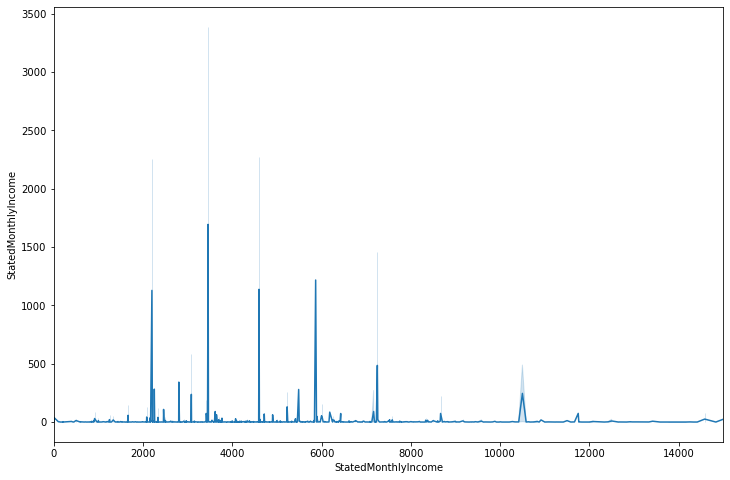

In [195]:
plt.figure(figsize=(12,8))
sb.lineplot(data =df, x = df['StatedMonthlyIncome'],y=df['StatedMonthlyIncome'].value_counts());
plt.xlim(0,15000)

We can notice here certain spikes right in our distribution.

I'll next explore recommendations which are number of recommendations the borrower had at the time the listing was created.

In [89]:
df.groupby('StatedMonthlyIncome')['StatedMonthlyIncome'].value_counts()

StatedMonthlyIncome  StatedMonthlyIncome
0.000000e+00         0.000000e+00           1394
8.333300e-02         8.333300e-02            251
2.500000e-01         2.500000e-01              1
8.333330e-01         8.333330e-01              1
1.416667e+00         1.416667e+00              1
                                            ... 
4.166667e+05         4.166667e+05              1
4.666667e+05         4.666667e+05              1
4.833333e+05         4.833333e+05              1
6.185478e+05         6.185478e+05              1
1.750003e+06         1.750003e+06              1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

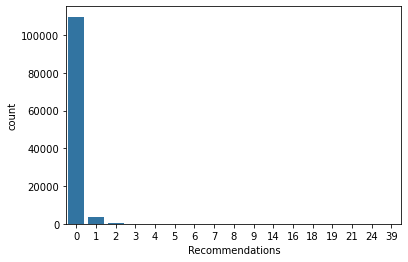

In [68]:
sb.countplot(data = df, x = 'Recommendations', color = def_color);

We see that most of the borrowers had no reccomendations 

I'll explore next how much of the borrowers provided documents to verify their income

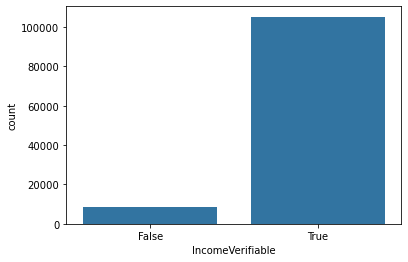

In [73]:
sb.countplot(data = df, x='IncomeVerifiable', color = def_color);

We see here that most of the borrowers do provide documents to verify their income

Next, I'll explore Debt to income ratio

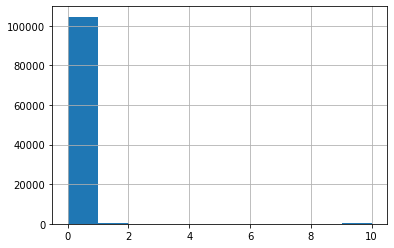

In [96]:
df['DebtToIncomeRatio'].hist();

In [97]:
df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

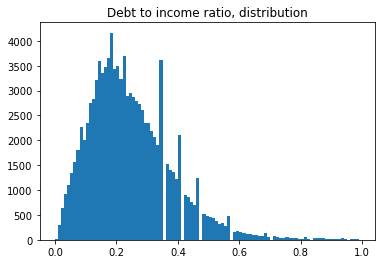

In [325]:
bins = np.arange(0,1,0.01)
plt.hist(data = df, x = 'DebtToIncomeRatio',bins=bins);
plt.title('Debt to income ratio, distribution');

The histogram showed a long tail distribution so I plotted the data again on a smaller scale to see the distribution better and it proved helpful as the ut shows that most of the loans' debt to income ratio lies between 0 and 0.4.

Next, I'll explore employment status.

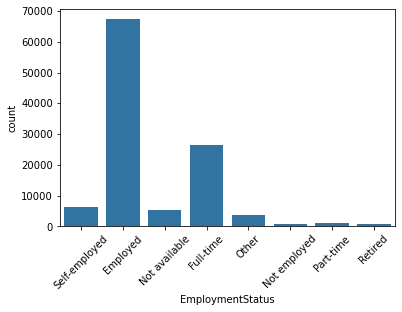

In [95]:
sb.countplot(data = df , x= 'EmploymentStatus', color = def_color);
plt.xticks(rotation= 45);

Next I'll explore total propser loans which is Number of on time payments the borrower made on Prosper loans at the time they created this listing.

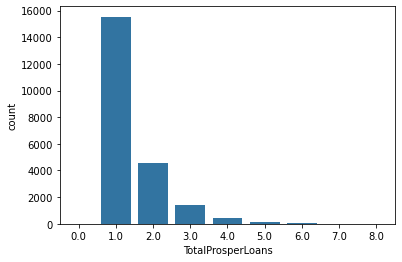

In [179]:
sb.countplot(data = df,x='TotalProsperLoans',color = def_color);

It shows here that most of the borrowers made one on-time payment on prosper loans.

In [121]:
df['TotalProsperPaymentsBilled'].value_counts()

9.0      1633
6.0      1219
10.0     1144
35.0     1069
11.0     1041
         ... 
133.0       1
141.0       1
120.0       1
122.0       1
109.0       1
Name: TotalProsperPaymentsBilled, Length: 130, dtype: int64

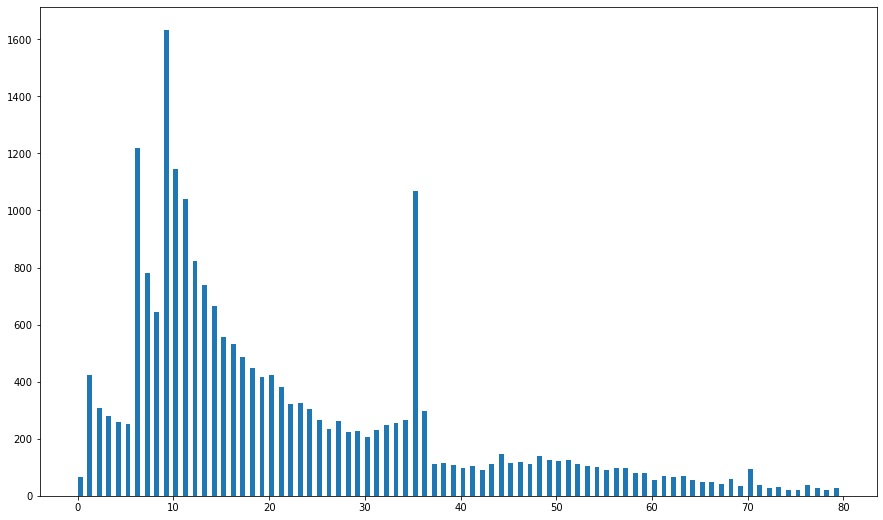

In [189]:
plt.figure(figsize=(15,9))
plt.hist(data = df,x = 'TotalProsperPaymentsBilled', bins = np.arange(0,80,0.5));

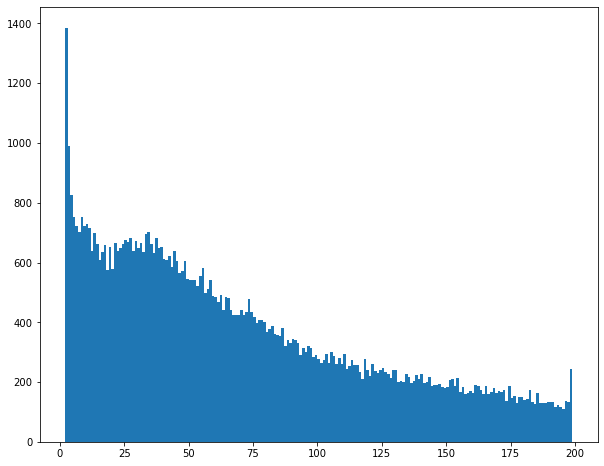

In [137]:
plt.figure(figsize=(10,8))
plt.hist(data= df, x = 'Investors', bins= np.arange(2,200,1));

In [183]:
df['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

#### Loan's original amount distribution

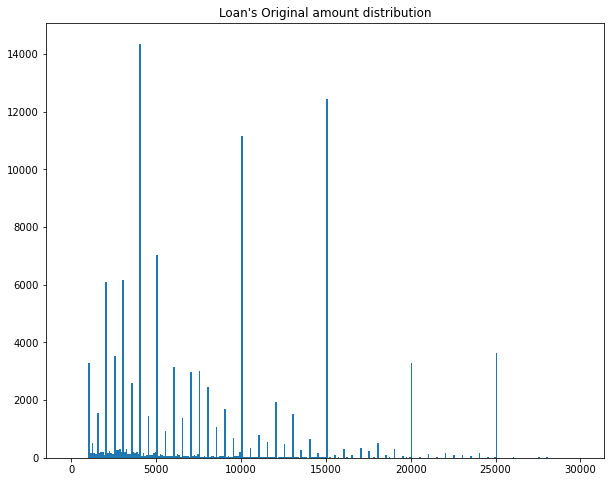

In [327]:
plt.figure(figsize=(10,8))
plt.hist(data=df, x = 'LoanOriginalAmount', bins= np.arange(0,3e4,100));
plt.title("Loan's Original amount distribution");

We see that are certain spikes at 4k, 5k, 10k, 15k, 20k, 25k

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The employment duration took a large range so I used log transformation. Also the stated monthly income and the debt to income ratio took a large range so I limited the values displayed on the x-axis to have a more closer look on the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some variables have outliers like, stated monthly income, debt to income ratio, employement duration, original loan amount so I'll remove those outliers and move on with the bivariate exploration

In [196]:
df_new = df.query('DebtToIncomeRatio <= 0.7')
df_new = df_new.query('LoanOriginalAmount <= 25000')
df_new = df_new.query('TotalProsperPaymentsBilled < 60')
df_new = df_new.query('StatedMonthlyIncome < 12000')

## Bivariate Exploration

### Does being a homeowner affects the loan status?

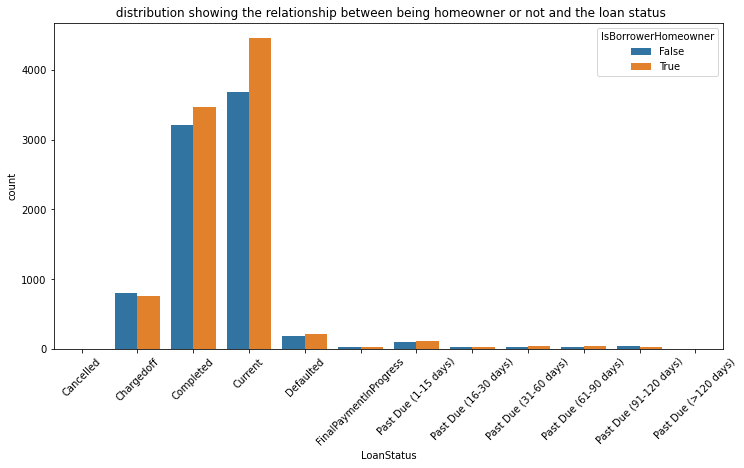

In [328]:
plt.figure(figsize=(12,6))
sample = np.random.choice(df.shape[0],5000,replace=False)
sample = df.iloc[sample]
sb.countplot(data = df_new, x='LoanStatus', hue='IsBorrowerHomeowner')
plt.xticks(rotation = 45);
plt.title(" distribution showing the relationship between being homeowner or not and the loan status");

- We see here there are similar findings regarding the loan's status and the borower being a homeowner or not. So being homeowner variable has a little significance to the loan's status.



- Next I'll look at the relationship between Loan's Term and loan's statuts

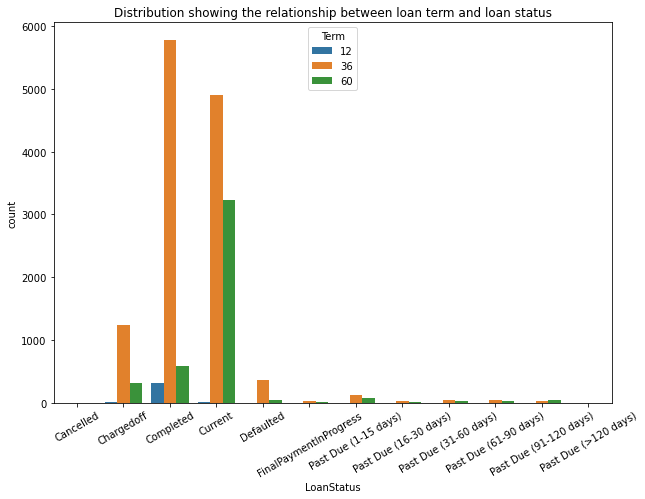

In [329]:
plt.figure(figsize=(10,7))
sb.countplot(data = df_new, x = 'LoanStatus', hue = 'Term');
plt.xticks(rotation = 30);
plt.title('Distribution showing the relationship between loan term and loan status');

Most of the loans are 36-term loans
It seems that most of the completed loans are 36-term loans with some loans.

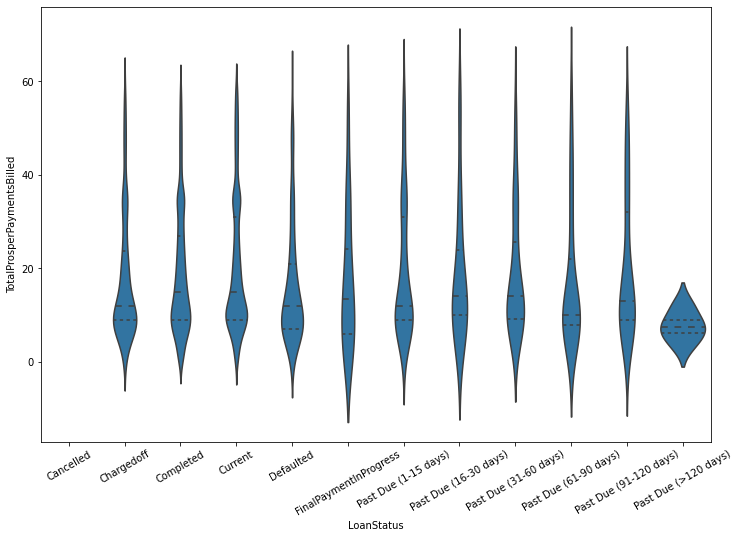

In [200]:
plt.figure(figsize=(12,8))
sb.violinplot(data = df_new, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', color = def_color, inner = 'quartile');
plt.xticks(rotation = 30);

We see here that all of the loan status have the similar Total prosper paid payments with the range (0-20) being the most except for loans that are past due more than 120 days, they have less paid payments. 

I'll explore next the Loan status and debt to income ration

In [309]:
df.groupby('LoanStatus')['StatedMonthlyIncome'].mean()

LoanStatus
Cancelled                 2608.933333
Chargedoff                4485.996143
Completed                 5324.522029
Current                   6153.262946
Defaulted                 4366.768683
FinalPaymentInProgress    6311.738211
Past Due (1-15 days)      5554.350910
Past Due (16-30 days)     5484.420440
Past Due (31-60 days)     5436.096648
Past Due (61-90 days)     5322.870341
Past Due (91-120 days)    4816.204770
Past Due (>120 days)      3726.562500
Name: StatedMonthlyIncome, dtype: float64

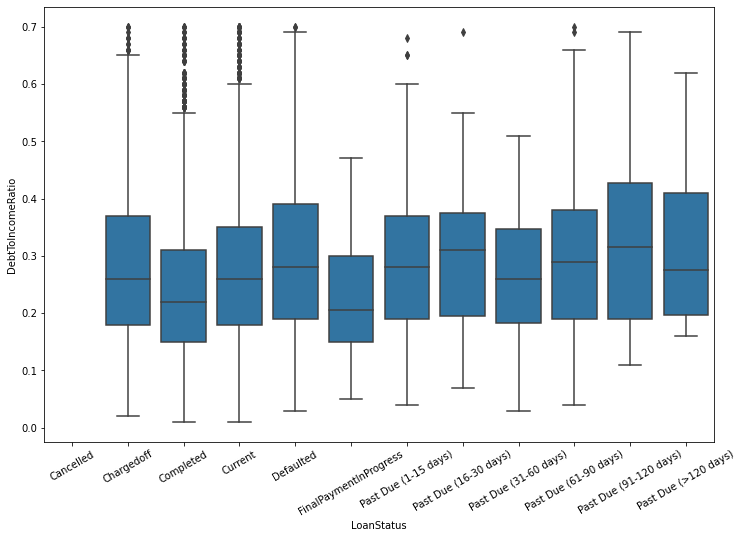

In [205]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df_new, x = 'LoanStatus', y = 'DebtToIncomeRatio', color = def_color);
plt.xticks(rotation = 30);

We see here that most of the loan status have similar debt to income ratio with the final payment in progress and completed loans with less ratios (0.16 - 0.3)  

Next I'll explore Loan status and Prosper score

### Distribution between  prosper score and loan status

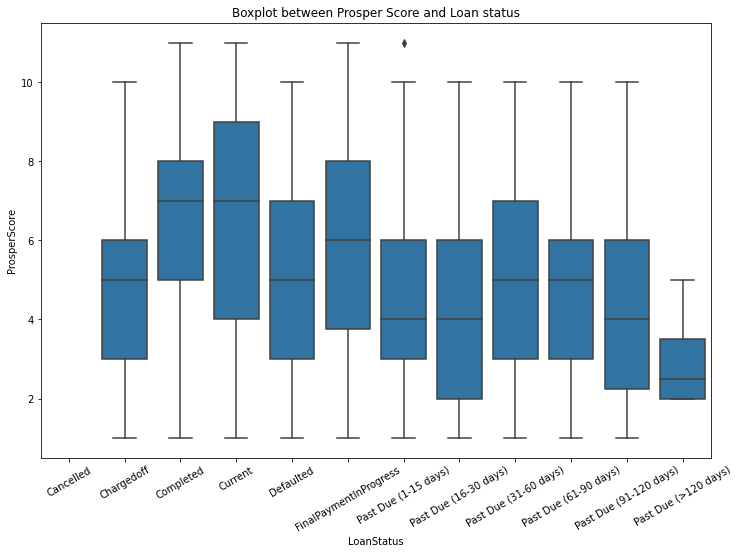

In [330]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df_new, x = 'LoanStatus', y = 'ProsperScore', color = def_color);
plt.xticks(rotation = 30);
plt.title('Boxplot between Prosper Score and Loan status');

Completed ,current and final payment in progress loans have higher Prosper Score followed by defaulted and charged off loan.

Next I'll explore the distribution of Loan status and the monthly income 

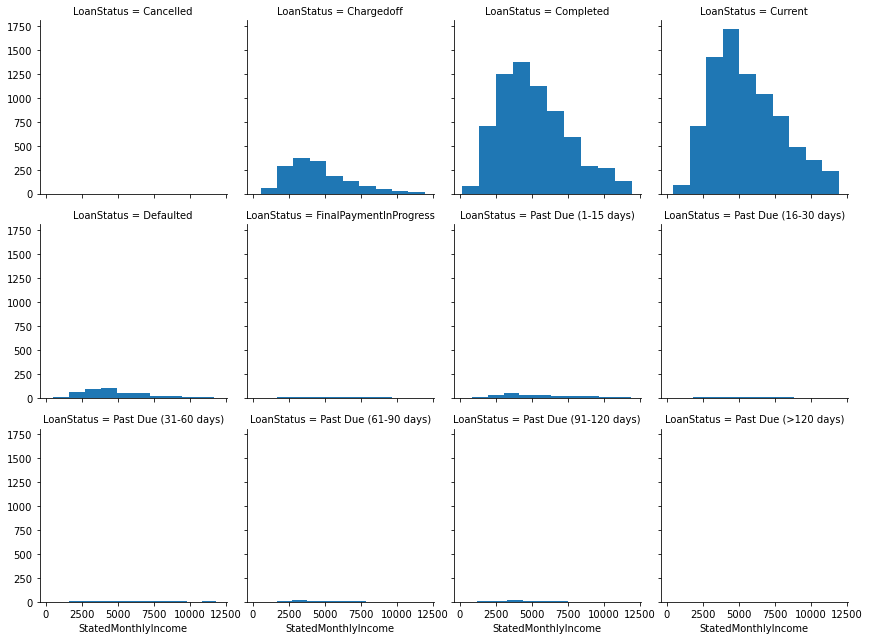

In [302]:
g = sb.FacetGrid(data= df_new, col = 'LoanStatus', col_wrap=4)
g.map(plt.hist,'StatedMonthlyIncome');

We see here that the most stated monthly income is between 4k - 5k. The distribution is kinda skewed to the right.

Next I'll explore Loan original amount and loan status

### Distribution of Loan Original amount for each loan status

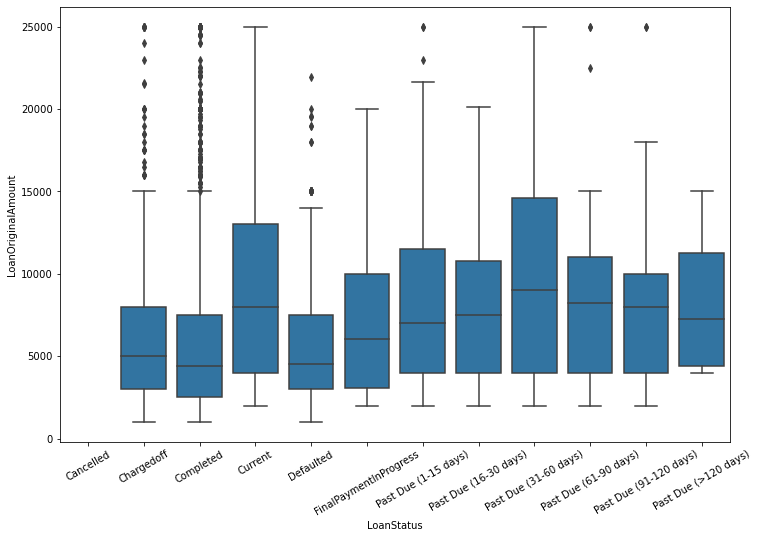

In [234]:
plt.figure(figsize=(12,8))
sb.boxplot(data=df_new, x = 'LoanStatus', y = 'LoanOriginalAmount', color = def_color);
plt.xticks(rotation = 30);

We see here that most of the completed, defaulted, chargedoff loans are less than 10k. While the other loan status have higher ranges.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I explored many variables with the loan status. It doesn't seem that there's a certain variables strongly correlated with a certain loan status. Some of the insights we got are:
    - most of the completed loans are 36-term loans
    - Completed loans borrowers have generally higher propser score, most monthly income of 5k
    - Loan amonuts of past-due loans are generally higher 
    - Debt to income ratio is in similar range for all the loans' status

## Multivariate Exploration

Loan status will be a fixed parameter in data exploration along with other different factors to figure out if there's are patterns or trends

In [245]:
sample = np.random.choice(df_new.shape[0],2000, replace=False)
sample = df_new.iloc[sample]

### Scatterplot between Debt to income ratio and loan amount for each loan status

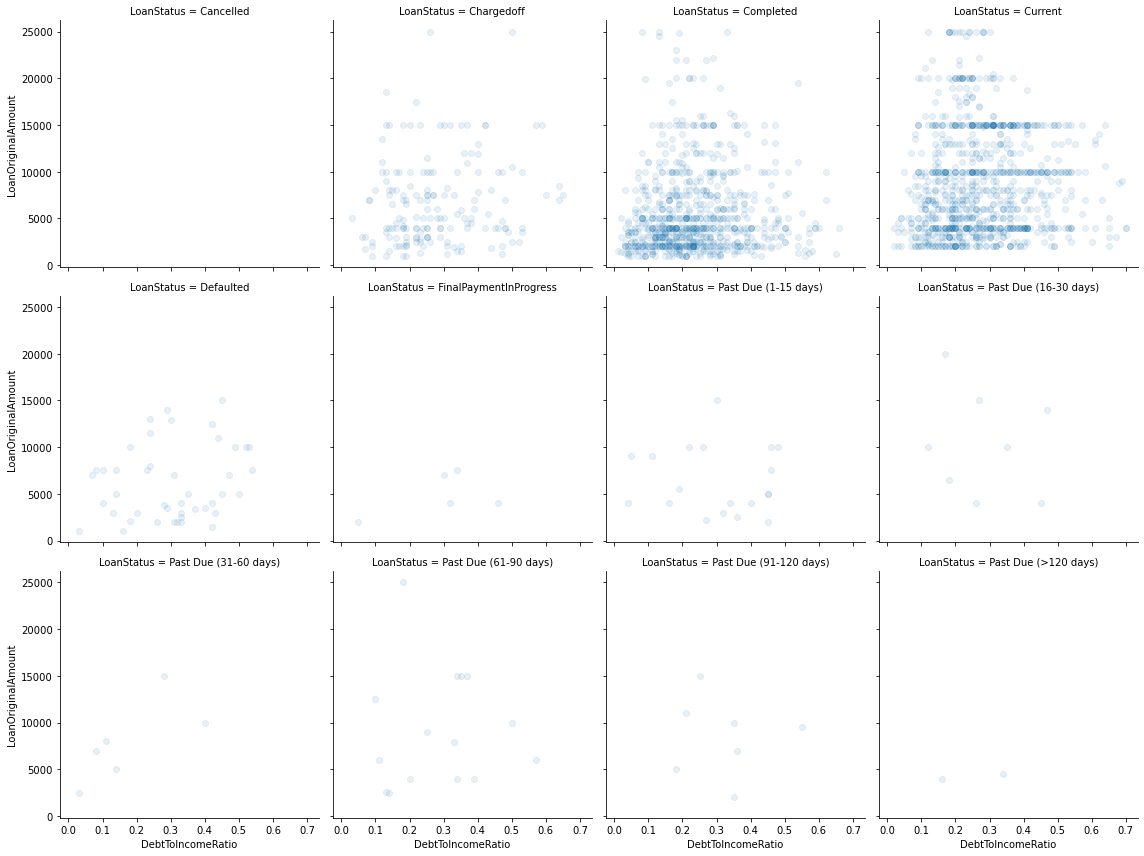

In [290]:
g= sb.FacetGrid(data = sample , col='LoanStatus',height = 4, col_wrap = 4)
g.map(plt.scatter,'DebtToIncomeRatio','LoanOriginalAmount', alpha = 1/10);

There's somehow a positive correlation between the debt to income ratio and the original loan amount.

next I'll explore the monthly income and debt to income ratio

### Plots showing the relationship between debt to income ratio and monthly income for each loan status

(0.0, 1.0)

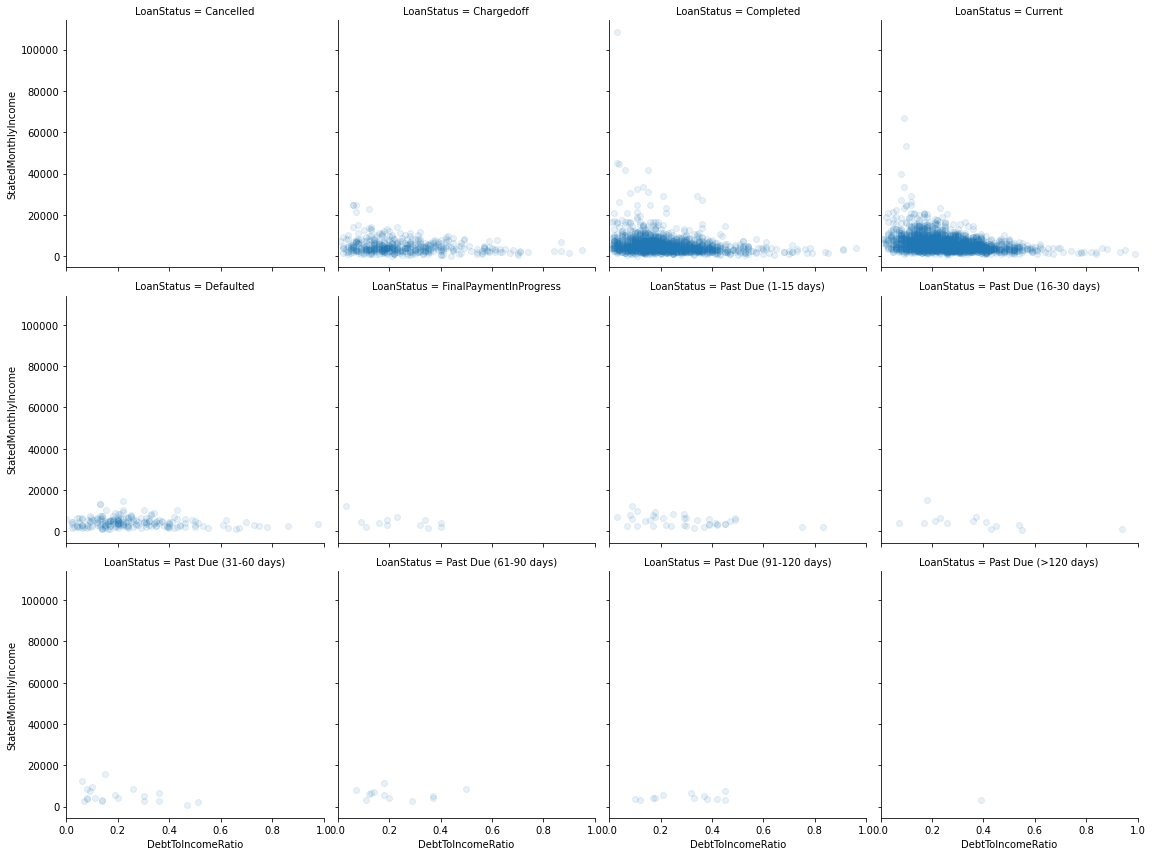

In [339]:
g= sb.FacetGrid(data = sample , col='LoanStatus',size = 4, col_wrap = 4)
g.map(plt.scatter,'DebtToIncomeRatio','StatedMonthlyIncome', alpha = 1/10);
plt.xlim(0,1)

There's a moderate negative correlaton between the monthly income and the debt to income ratio. This is a strange finding as it should be a positive one.

next I'll explore income range and debt to income ratio

/home/kareem/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


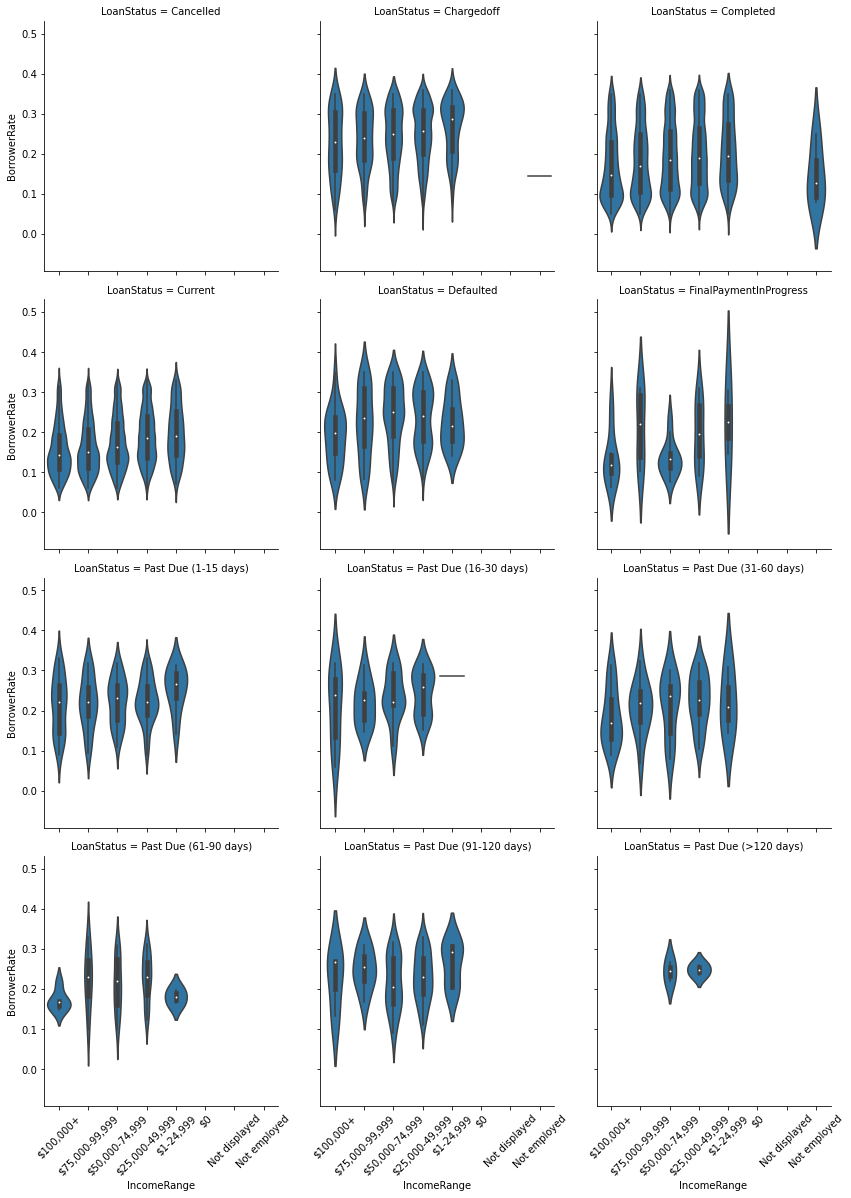

In [314]:
g= sb.FacetGrid(data = df_new , col='LoanStatus',height = 4, col_wrap = 3)
g.map(sb.violinplot,'IncomeRange','BorrowerRate')
g.set_xticklabels(rotation = 45);

The debt ratio for different income ranges is equally distributed.

next i'll explore loan rate

### Plots showing the relationship between debt to income ratio and loan rate for each loan status

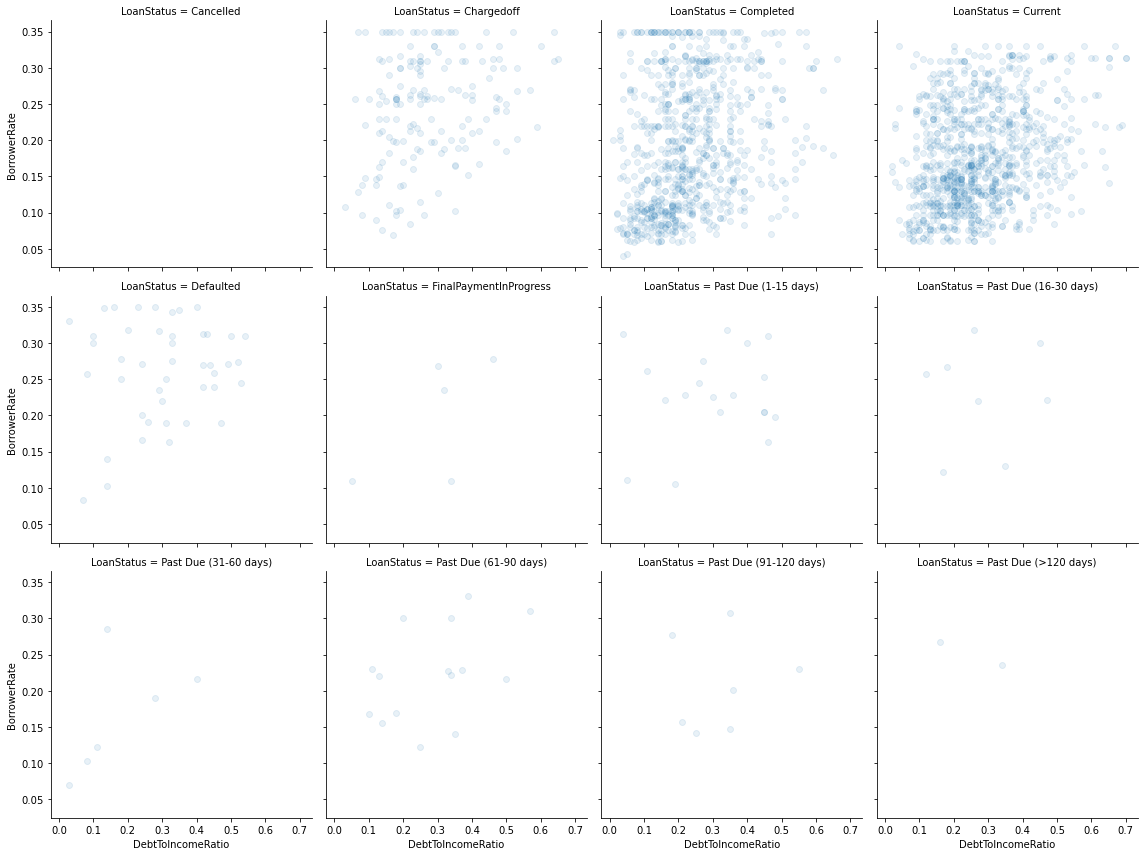

In [316]:
g= sb.FacetGrid(data = sample , col='LoanStatus',height = 4, col_wrap = 4)
g.map(plt.scatter,'DebtToIncomeRatio','BorrowerRate', alpha = 1/10);

There's a moderate positive correalation between the debt to income ratio in nearly most of the loan status

next i'll explore the monthly payment and the annual rate of the loan

### Plots showing the relationship between monthly payment and annual loan rate for each loan status

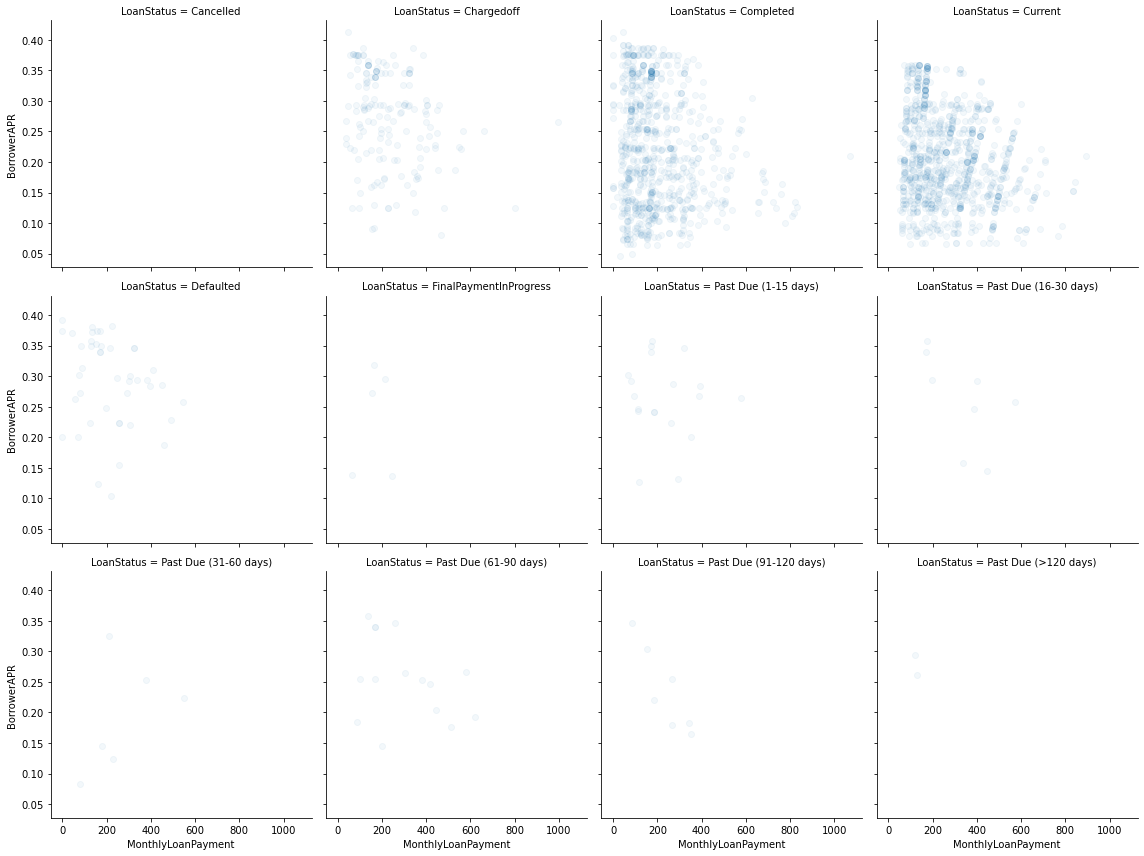

In [318]:
g= sb.FacetGrid(data = sample , col='LoanStatus',size = 4, col_wrap = 4)
g.map(plt.scatter,'MonthlyLoanPayment','BorrowerAPR',alpha=1/20);

It appears that there's a negative relationship, as monthy payment increase, rate tends to decrease


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After exploring different paramters, there weren't any factors that were strongly correlated with each of the loans' status. All of the loan status had similar values for different factors in our dataset.

### Were there any interesting or surprising interactions between features?

> There were interesting interactions between the monthly payment and the debt to income ratio, a moderate positive correlation.
> a moderate negative correlation was obersved as well between the monthly payment and the loan's rate
> a moderate positive correlation was observed between the debt to income ratio and the rate of the loan